Hi there 😃, In this notebook I am going to *explore* and *visualize* the dataset. 
I will also replace abbreviations with their **full forms** for better understanding and interpretation of the figures. 
**To give a clear example**, 'S : Small', 'M: Medium', 'L: Large'

The dataset available on [Kaggle](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023). 

Data Science Job Salaries Dataset contains 11 columns, each are:

*   **work_year:** The year the salary was paid.
*   **experience_level:** The experience level in the job during the year
*   **employment_type:** The type of employment for the role
*   **job_title:** The role worked in during the year.
*   **salary:** The total gross salary amount paid.
*   **salary_currency:** The currency of the salary paid as an ISO 4217 currency code.
*   **salaryinusd:** The salary in USD
*   **employee_residence:** Employee's primary country of residence in during the work year as an ISO 3166 country code.
*   **remote_ratio:** The overall amount of work done remotely
*   **company_location:** The country of the employer's main office or contracting branch
*   **company_size:** The median number of people that worked for the company during the year

***
<br>

**📜 Table Of Contents:**
* [Gathering and Observing Data](#section-one)
* [Data Visualization](#section-two)
    - [I. Top 10 Jobs For Each Work Year](#section-three)
    - [II. Top 3 Jobs for Experience Level](#section-four)
    - [III. Employment Type](#section-five)
    - [IV. Salary Distributions](#section-six)
    - [V. Average Salaries](#section-seven)
    - [VI. Remote Ratio](#section-eight)
    - [VII. Top 10 Countries with The Most Employees](#section-nine)



# **Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
pd.set_option('display.float_format',  '{:.2f}'.format)

import matplotlib.pyplot as plt
import seaborn as sns

<a id="section-one"></a>
# **Gathering and Observing Data**

In [2]:
df = pd.read_csv("ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
def show_table(data, head=5):
    print("\n******Shape******")
    print(f'Shape     : {df.shape}\n'
          f'Size      : {df.size}\n' 
          f'Dimension : {df.ndim}')
    print("\n******Types******")
    print(data.dtypes)
    print("\n******Head******")
    print(data.head(head))
    print("\n******Tail******")
    print(data.tail(head))
    print("\n******Random Sampling******")
    print(data.sample(head))
    print("\n******Missing Values******")
    print(data.isnull().sum())
    print("\n******Duplicated Values******")
    print(data.duplicated().sum())
    print("\n******Unique Values******")
    print(data.nunique())
    print("\n******Describe******")
    print(data.describe().T)
    print("\n******Object Describe******")
    print(data.describe(include=['O']).T)

In [6]:
show_table(df)


******Shape******
Shape     : (3755, 11)
Size      : 41305
Dimension : 2

******Types******
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

******Head******
   work_year experience_level employment_type                 job_title  salary salary_currency  salary_in_usd employee_residence  remote_ratio company_location company_size
0       2023               SE              FT  Principal Data Scientist   80000             EUR          85847                 ES           100               ES            L
1       2023               MI              CT               ML Engineer   30000             USD          30000                 US           100               US            S
2       2023               MI     

In [5]:
df.loc[df.duplicated(), :]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


In [27]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]
    cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    cat_cols = cat_cols + num_but_cat
    num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]
    
    print(f'Observations {dataframe.shape[0]}')
    print(f'Variables:  {dataframe.shape[1]}')
    print(f'cat_cols:  {len(cat_cols)}')
    print(f'num_cols:  {len(num_cols)}')
    print(f'cat_but_car:  {len(cat_but_car)}')
    print(f'num_but_cat:  {len(num_but_cat)}')
    
    return cat_cols, num_cols, cat_but_car

In [8]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations 3755
Variables:  11
cat_cols:  4
num_cols:  0
cat_but_car:  3
num_but_cat:  0


<a id="section-two"></a>
# **Data Visualization**

In [9]:
df['experience_level'] = df['experience_level'].replace(['EN', 'MI', 'SE', 'EX'], 
                                                        ['Entry-Level', 'Mid-Level', 'Senior-Level', 'Executive-Level'])
df['employment_type'] = df['employment_type'].replace(['PT', 'FT', 'FL', 'CT'], 
                                                      ['Part-Time', 'Full-Time', 'Freelance', 'Contract'])
df['remote_ratio'] = df['remote_ratio'].replace([0, 50, 100], 
                                                ['On-Site', 'Hybrid', 'Remote'])
df['company_size'] = df['company_size'].replace(['S', 'M', 'L'], 
                                                ['Small', 'Medium', 'Large'])

<a id="section-three"></a>
### **I. Top 10 Jobs For Each Work Year**

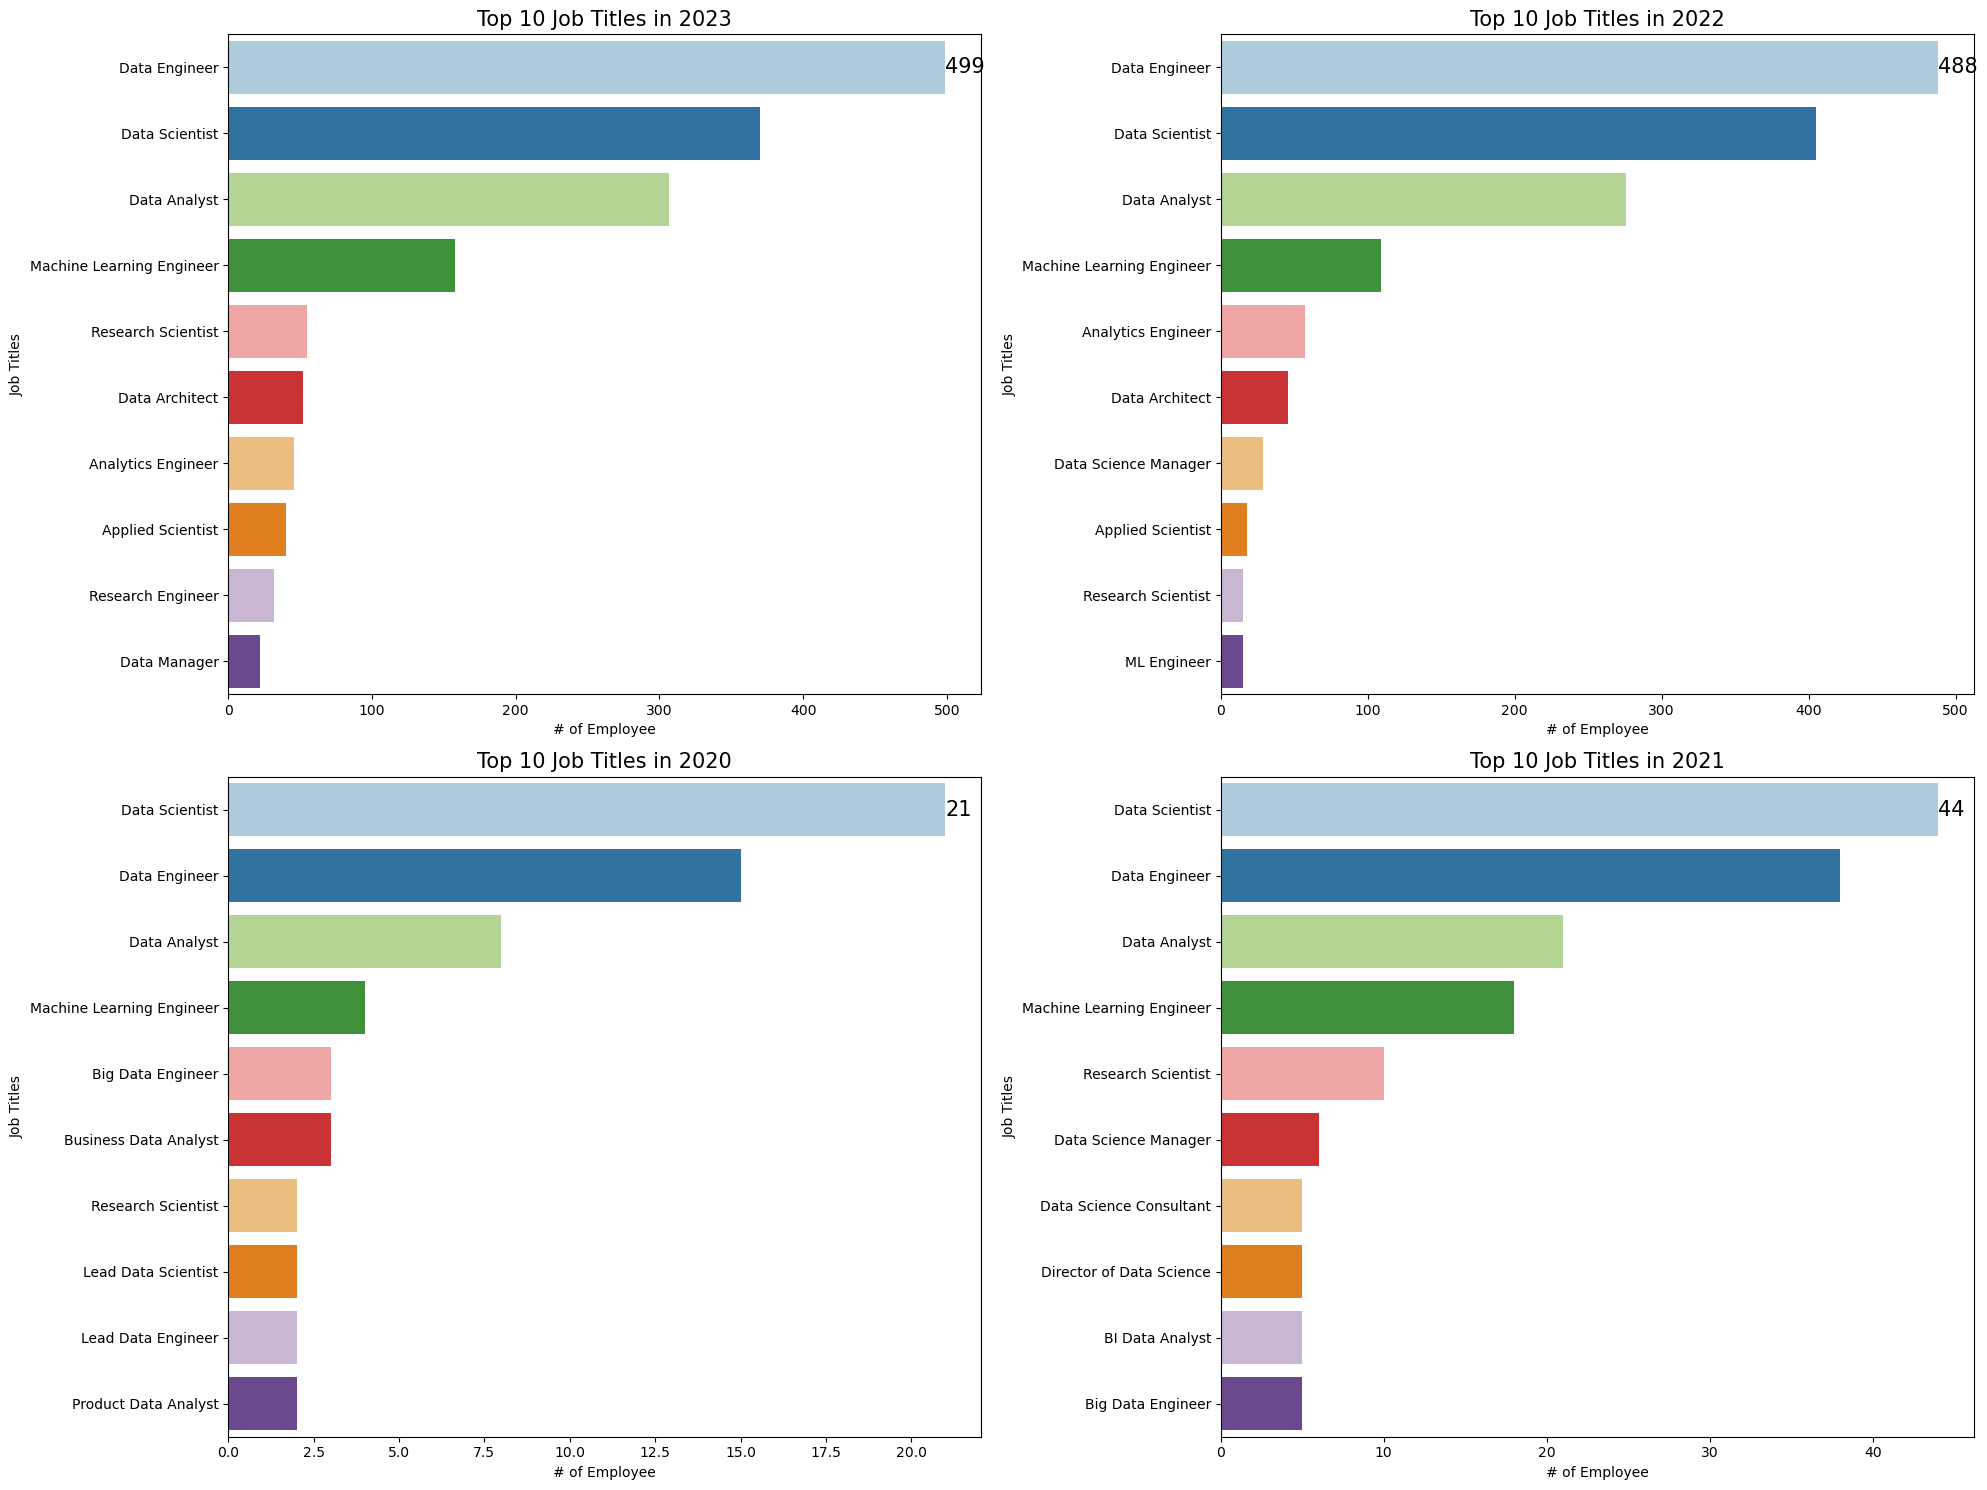

In [22]:
a = 2  
b = 2  
c = 1  
fig = plt.figure(figsize = (20, 15))

for year in df.work_year.unique():
    dft = df[df['work_year']==year]['job_title'].value_counts().nlargest(10).reset_index()
    
    plt.subplot(a, b, c)
    ax = sns.barplot(data = dft , y = 'job_title', x = 'count', hue = 'job_title', palette="Paired", legend=False)
    plt.ylabel('Job Titles')
    plt.xlabel('# of Employee')
    plt.title(f'Top 10 Job Titles in {year}', size=15)
    ax.bar_label(ax.containers[0], size=15)
    c = c + 1

plt.tight_layout()
plt.show()


<a id="section-four"></a>
### **II. Top 3 Jobs for Experience Level**

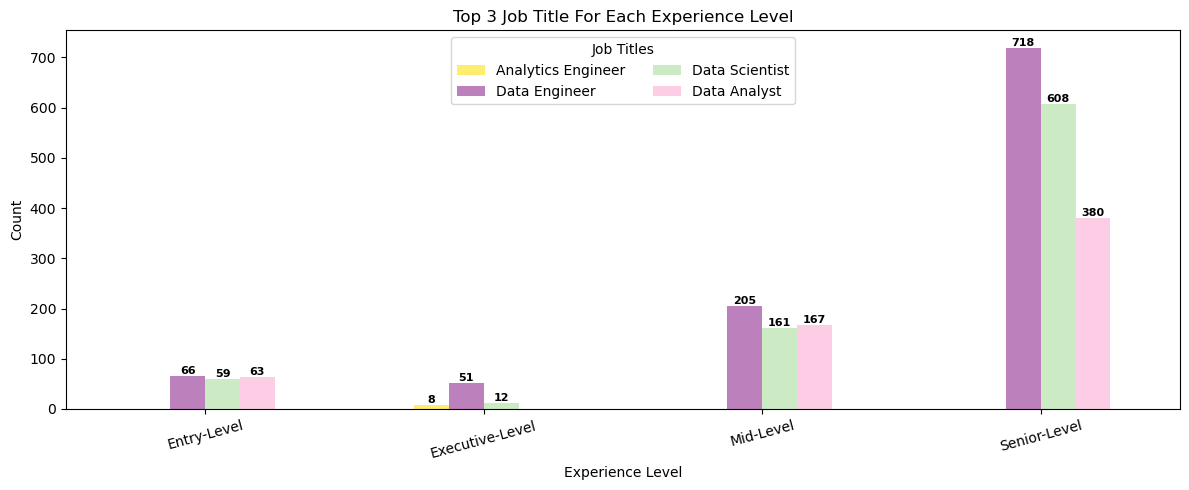

In [15]:
dft = df.groupby(['experience_level'])['job_title'].value_counts().groupby(level=0, group_keys=False).head(3)
label_order = ['Analytics Engineer', 'Data Engineer', 'Data Scientist', 'Data Analyst']

palette_set3 = sns.color_palette("Set3")
palette = sns.color_palette([palette_set3[11], palette_set3[9], palette_set3[10], palette_set3[7]])

ax = dft.unstack(level=1)[label_order].plot(kind= 'bar', 
                                            figsize = (12, 5),
                                            color=palette)
ax.legend(loc='upper center', ncol=2, title="Job Titles")

for i in ax.patches:    
    if i.get_height() != 0:
        ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()+10,
                s = int(i.get_height()), 
                ha = 'center', va='center', size = 8, weight = 'bold')
    
plt.title("Top 3 Job Title For Each Experience Level")
plt.xticks(rotation=15, horizontalalignment="center")
plt.ylabel("Count")
plt.xlabel("Experience Level")
plt.tight_layout()

<a id="section-five"></a>
### **III. Employment Type**

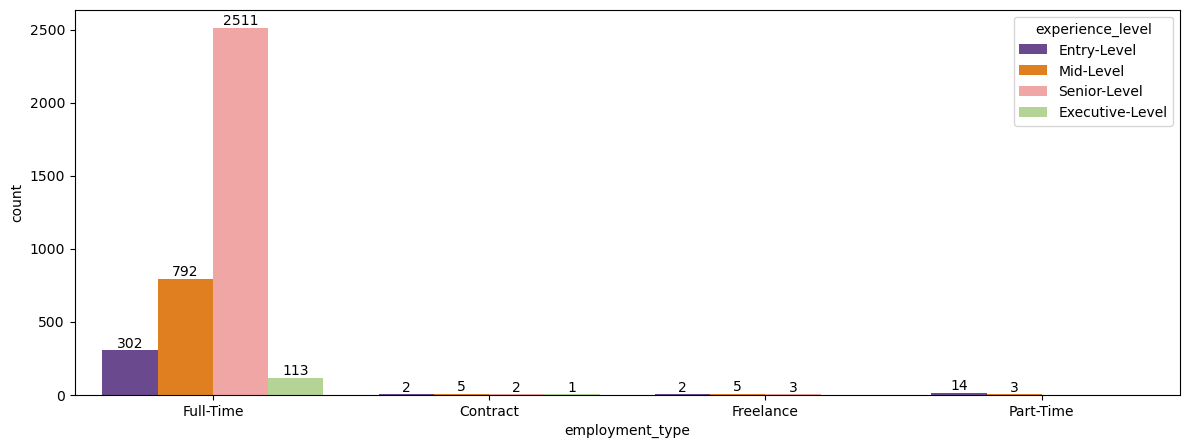

In [16]:
fig = plt.figure(figsize = (14.26, 5))
order = ['Entry-Level', 'Mid-Level', 'Senior-Level', 'Executive-Level']
ax = sns.countplot(data=df, x='employment_type', hue='experience_level', hue_order=order, palette='Paired_r')
for container in ax.containers:
    ax.bar_label(container)

<a id="section-six"></a>
### **IV. Salary Distributions**

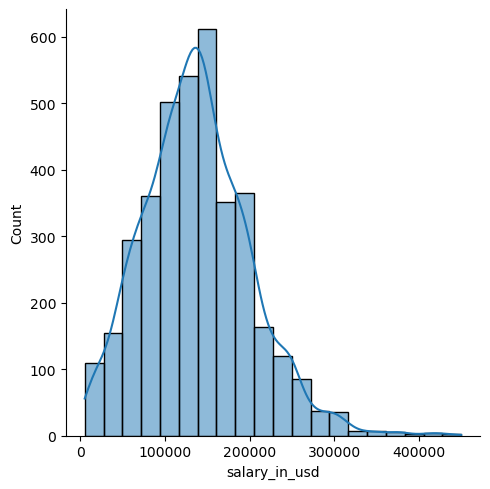

In [29]:
sns.displot(data=df, x='salary_in_usd', kde=True, bins=20);

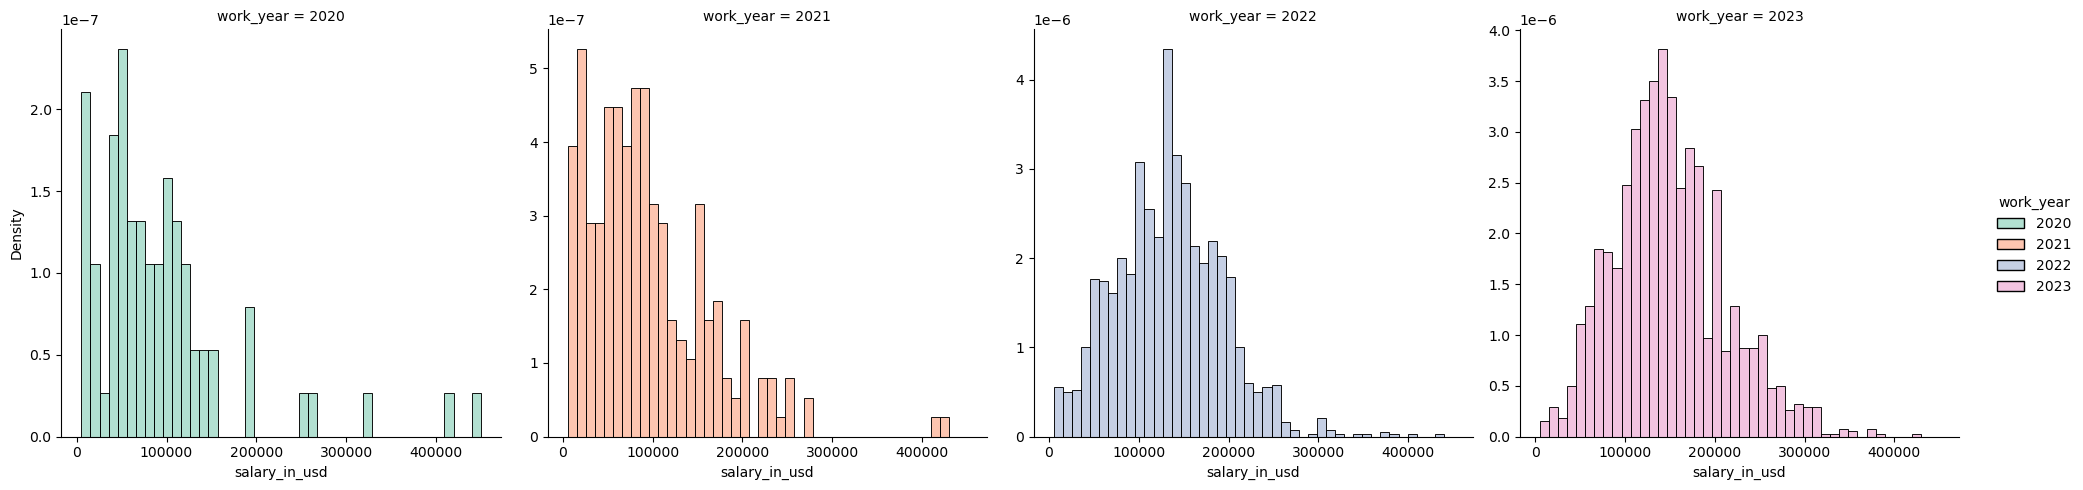

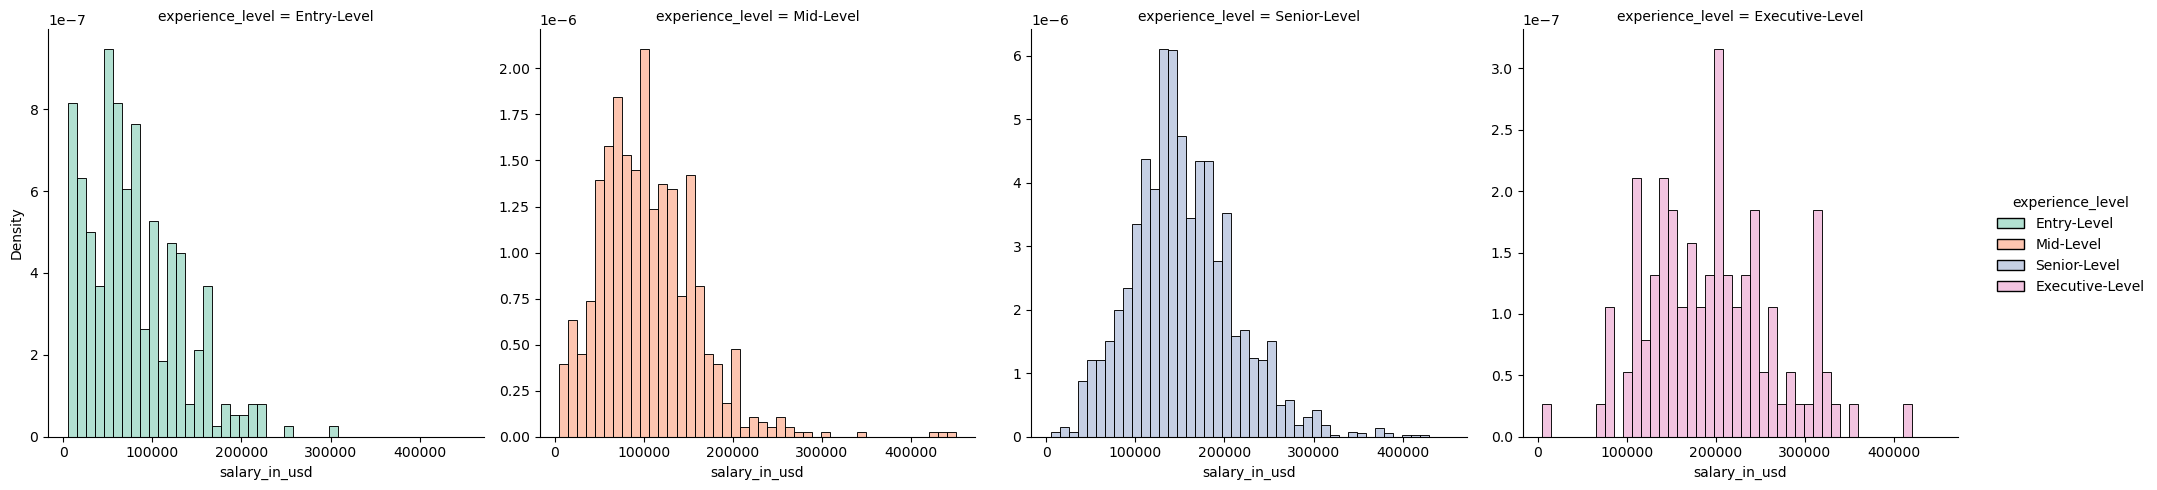

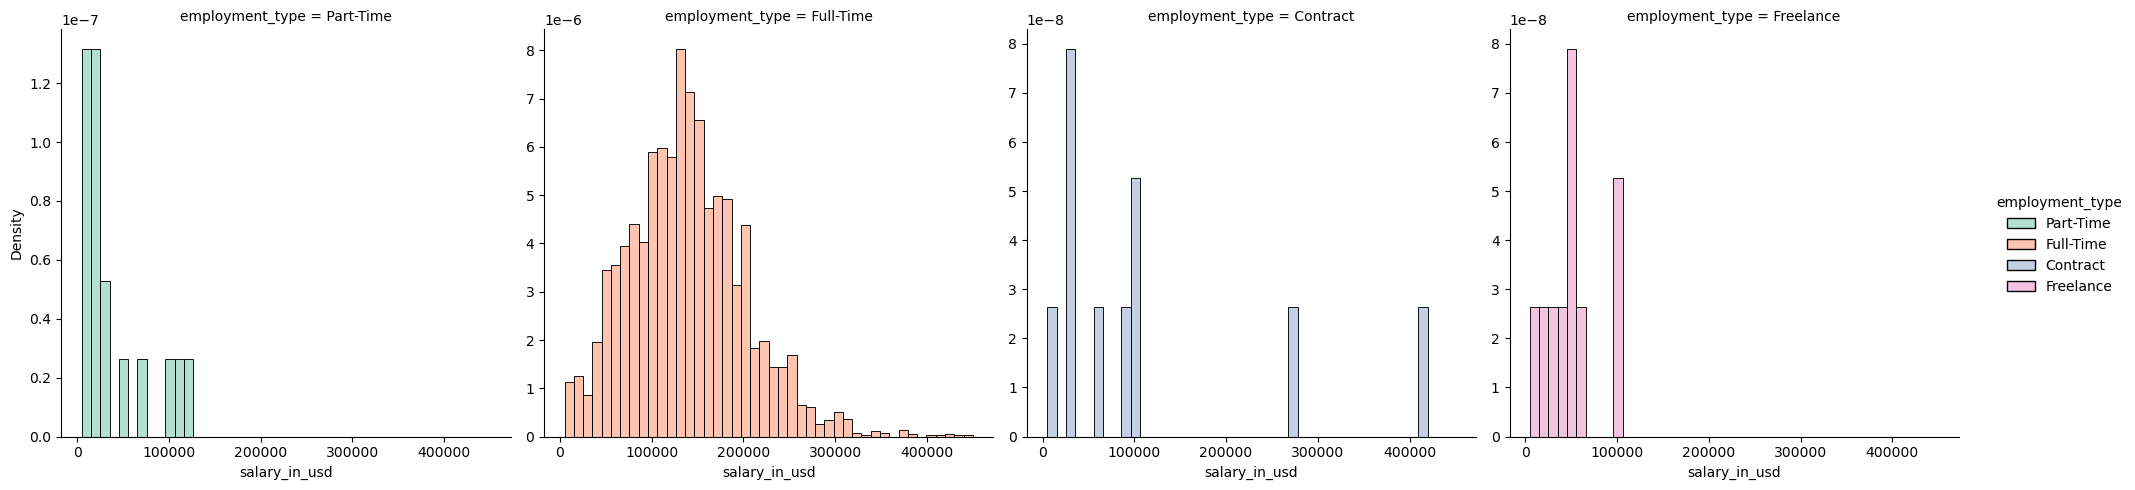

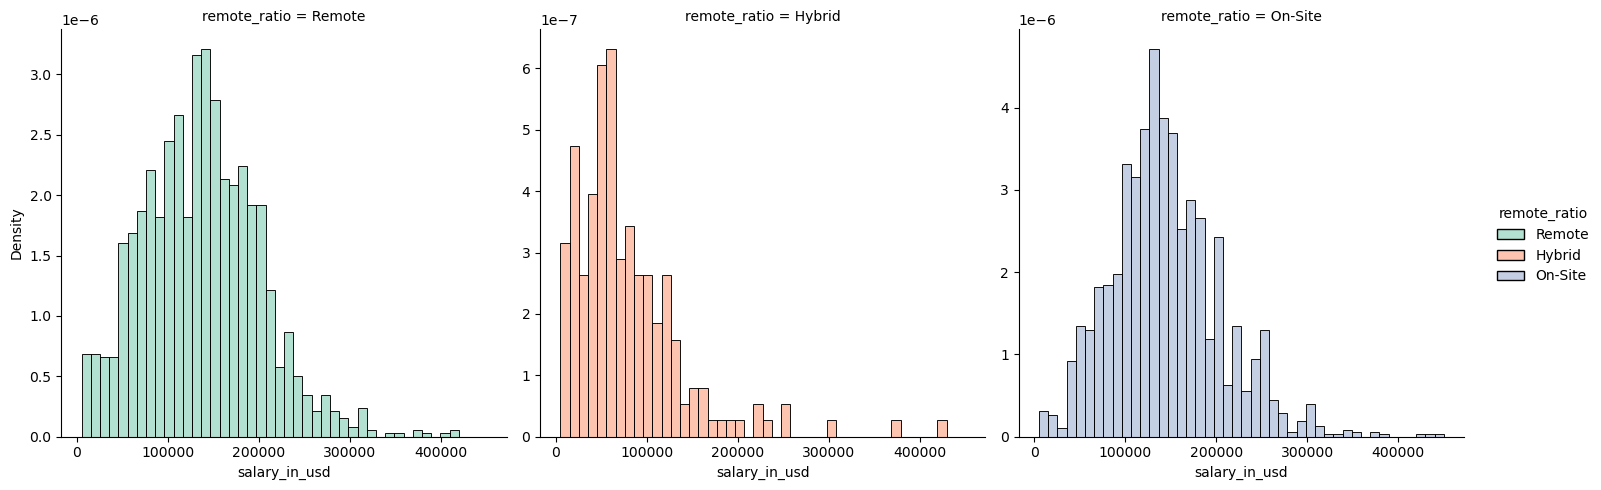

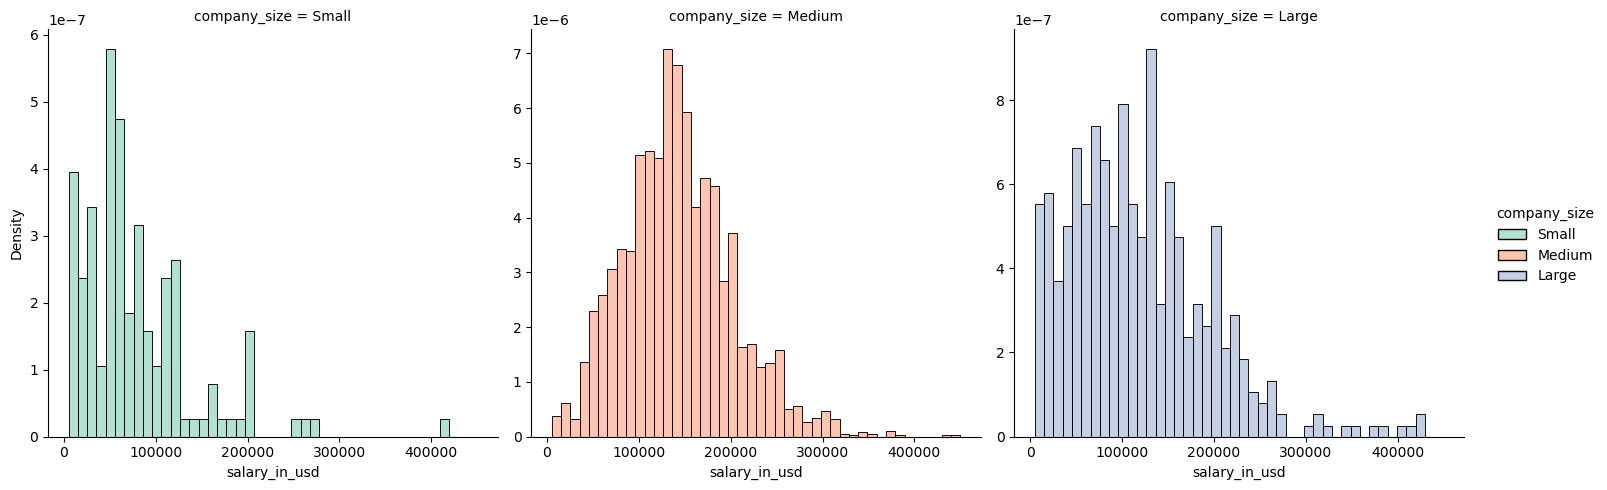

In [26]:
hues_cols_orders = {'work_year': None, 
                    'experience_level': ['Entry-Level', 'Mid-Level', 'Senior-Level', 'Executive-Level'], 
                    'employment_type': ['Part-Time', 'Full-Time', 'Contract', 'Freelance'], 
                    'remote_ratio': ['Remote', 'Hybrid', 'On-Site'], 
                    'company_size': ['Small', 'Medium', 'Large']}

for hue_col,order in hues_cols_orders.items():
        dist = sns.displot(data=df, x='salary_in_usd', hue=hue_col, col=hue_col,
                           hue_order=order, col_order=order, palette='Set2',
                           stat='density', facet_kws={'sharey': False, 'sharex': False});

<a id="section-seven"></a>
### **V. Average Salaries**

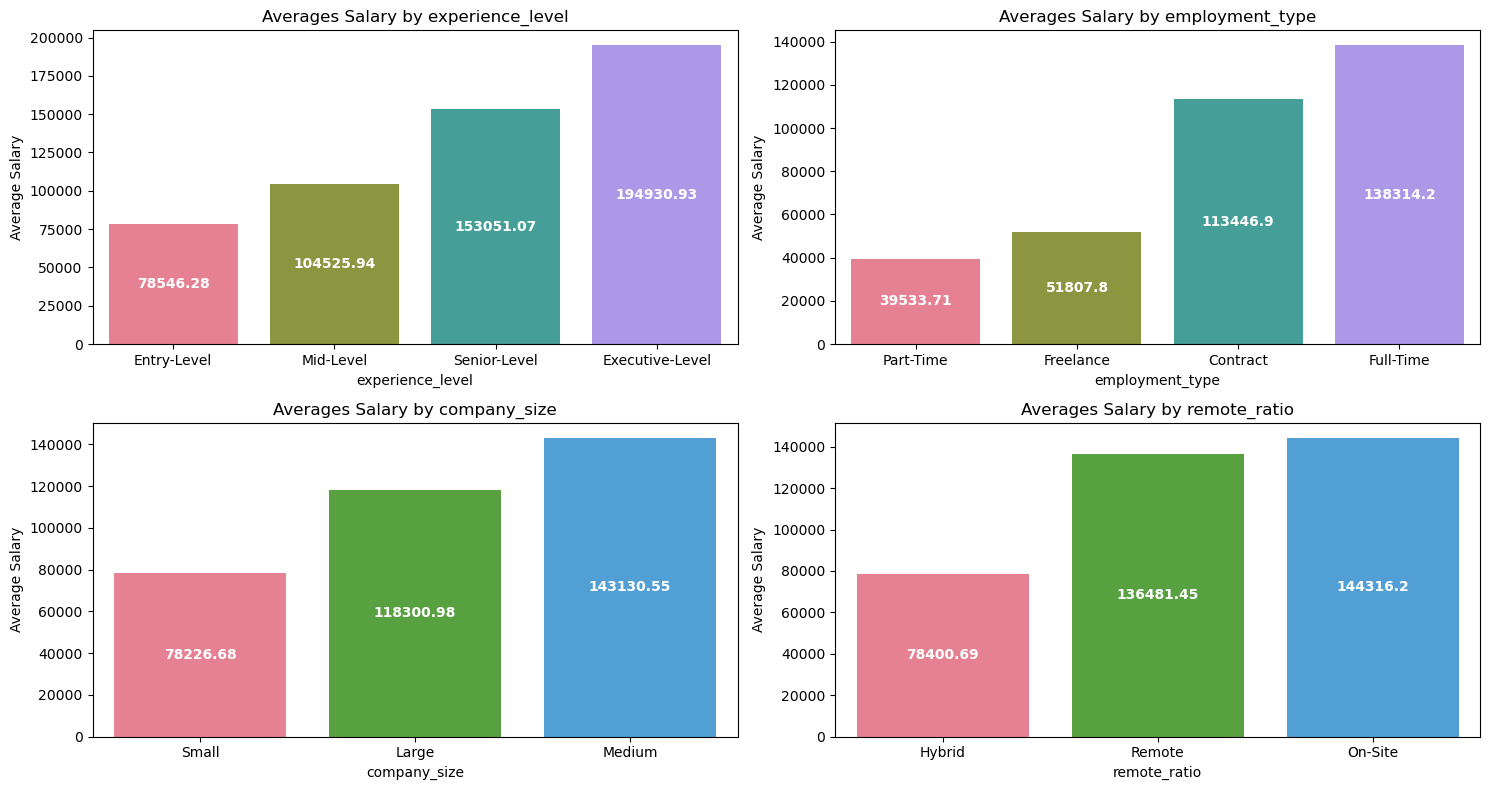

In [24]:
a = 2  
b = 2  
c = 1  
columns= ['experience_level', 'employment_type', 'company_size', 'remote_ratio']
fig = plt.figure(figsize = (15, 8))

for col in columns:
    dft = df.groupby([col], as_index=False).agg({'salary_in_usd': 'mean'}).sort_values(by='salary_in_usd').reset_index(drop=True)
    
    plt.subplot(a, b, c)
    ax = sns.barplot(data=dft, x=col, y='salary_in_usd', hue=col,
                     palette=sns.color_palette("husl", dft.shape[0]), 
                     errorbar=('ci', False), legend=False);

    for i in ax.patches:    
        ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
                s = f"{round(i.get_height(),2)}", 
                ha = 'center', va ='center', size = 10, weight = 'bold', color = 'white')
        
    plt.title(f"Averages Salary by {col}")
    plt.ylabel("Average Salary")
    plt.xlabel(f"{col}");
    c = c + 1

plt.tight_layout()
plt.show()


<a id="section-eight"></a>
### **VI. Remote Ratio**

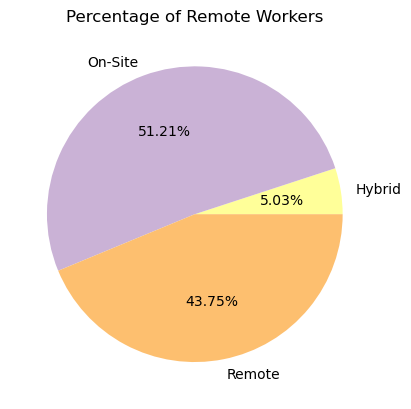

In [20]:
ax = df.groupby(['remote_ratio'])['work_year'].count().plot.pie(explode=[0, 0, 0], 
                                                                ylabel='',
                                                                autopct='%.2f%%',
                                                                colors=sns.color_palette('Paired_r'))
ax.set_title("Percentage of Remote Workers");

<a id="section-nine"></a>
### **VII. Top 10 Countries with The Most Employees**

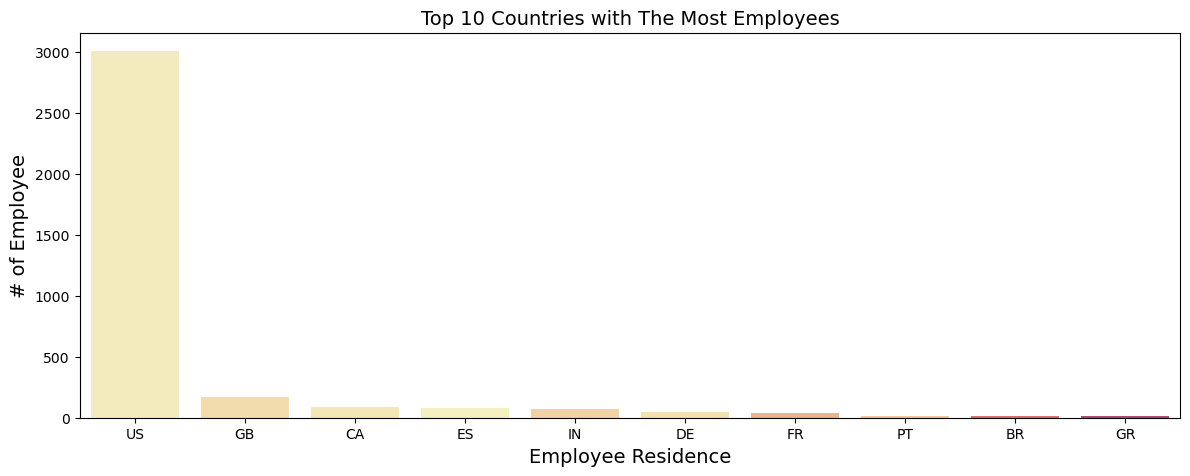

In [25]:
fig = plt.figure(figsize = (14.2, 5))

order = df.employee_residence.value_counts().iloc[:10].index
sns.countplot(data=df, x='employee_residence', hue='employee_residence', palette='magma_r', order=order, legend=False)

plt.xlabel("Employee Residence", size = 14)
plt.ylabel("# of Employee", size = 14)
plt.title('Top 10 Countries with The Most Employees', fontsize = 14);
